# Modelagem Evaporação
# Gibram Raul Campos de Oliveira
# gibram@gmail.com

Nota importante:

Como todo trabalho de ciência de dados, o mesmo deve acontecer em ciclos de iteração com o especialista na área. 

Logo, não se deve preocupar na primeira iteração com a performance do modelo. Mas sim com o profundo entendimento dos dados, do problema e da troca de aprendizados entre o especialista e o cientista.

Este trabalho representa esta realidade. Trata-se do ciclo inicial. Uma avaliação dos dados e a primeira iteração do processo de resolução do problema. Após apresentados os resultados e os insigths para o especialista (cliente), um novo ciclo é realizado com os aprendizados adquiridos nesta apresentação.

Depois de algum tempo, a performance é levada em consideração para atingir as especificações fim da sintonização do modelo de forma a melhorar sua performance.

# Importando bibliotecas

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os

import pandas_profiling as pp

# Importando a base de dados

# Caparaó

Inicialmente faremos o passo a passo com Caparaó. Depois a análise incluirá as demais cidades.

In [108]:
nome_arquivo = 'gibram.xlsx'
data =  pd.read_excel(nome_arquivo, spreadsheet='caparao')


#   1.	ano (YYYY) 
#   2.	dia (dd) 
#   3.	mês(mm)
#   4.	Temperatura máxima (°C)
#   5.	Temperatura média compensada(°C)
#   6.	Temperatura mínima (°C)
#   7.	Velocidade do vento (m/s)
#   8.	Insolação (h)
#   9.	Umidade relativa (%)
#   10.	Modelo padrão (variável de inferência)

# Verificando dados faltantes

In [109]:
data.head(5)

,ano,dia,mês,Temperatura máxima (°C),Temperatura média compensada(°C),Temperatura mínima (°C),Velocidade do vento (m/s),Insolação (h),Umidade relativa (%),Modelo padrão
0,1980,19,2,25.7,20.26,16.4,2.07,5.3,87.25,3.59
1,1980,21,2,26.6,21.34,15.3,2.10,6.3,84.25,3.78
2,1980,22,2,28.4,20.52,15.8,0.87,7.6,79.75,4.21
3,1980,23,2,30.7,21.94,12.8,1.57,9.5,70.75,5.06
4,1980,29,2,28.8,20.52,15.4,0.70,6.7,79.50,3.88


In [110]:
data.describe()

,ano,dia,mês,Temperatura máxima (°C),Temperatura média compensada(°C),Temperatura mínima (°C),Velocidade do vento (m/s),Insolação (h),Umidade relativa (%),Modelo padrão
count,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000
mean,2004.295864,15.807872,6.474983,26.913676,19.643402,14.651768,1.042522,6.855637,77.428286,3.426701
std,9.477624,8.636185,3.342012,3.164092,3.035628,4.139052,0.888390,3.341670,7.241709,1.199115
min,1980.000000,1.000000,1.000000,15.400000,9.980000,0.500000,0.030000,0.100000,46.500000,1.150000
25%,2000.000000,8.000000,4.000000,24.800000,17.240000,11.600000,0.500000,4.400000,73.250000,2.450000
50%,2006.000000,16.000000,7.000000,27.200000,20.200000,15.600000,0.700000,7.500000,78.250000,3.250000
75%,2011.000000,23.000000,9.000000,29.200000,22.140000,17.900000,1.370000,9.500000,82.500000,4.310000
max,2018.000000,31.000000,12.000000,37.600000,26.200000,23.200000,6.670000,12.900000,97.250000,7.700000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 10 columns):
ano                                 2998 non-null int64
dia                                 2998 non-null int64
mês                                 2998 non-null int64
Temperatura máxima (°C)             2998 non-null float64
Temperatura média compensada(°C)    2998 non-null float64
Temperatura mínima (°C)             2998 non-null float64
Velocidade do vento (m/s)           2998 non-null float64
Insolação (h)                       2998 non-null float64
Umidade relativa (%)                2998 non-null float64
Modelo padrão                       2998 non-null float64
dtypes: float64(7), int64(3)
memory usage: 234.3 KB


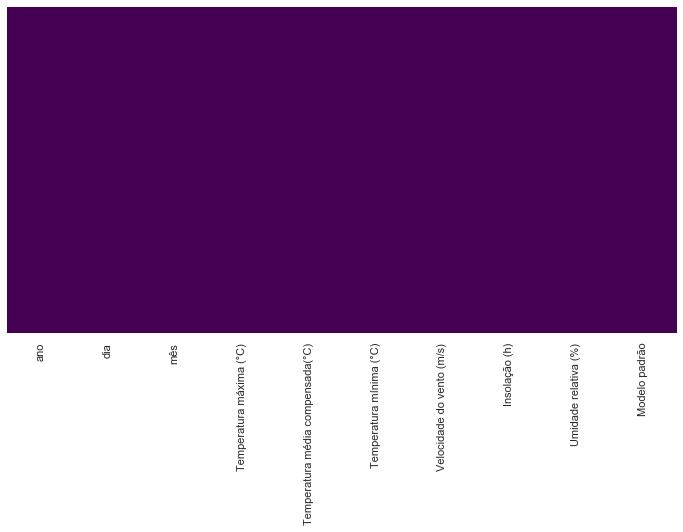

In [111]:
data.info()
plt.figure(figsize=(12,6))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Nota-se acima que não há dados faltantes.

### Tratando os Outliers

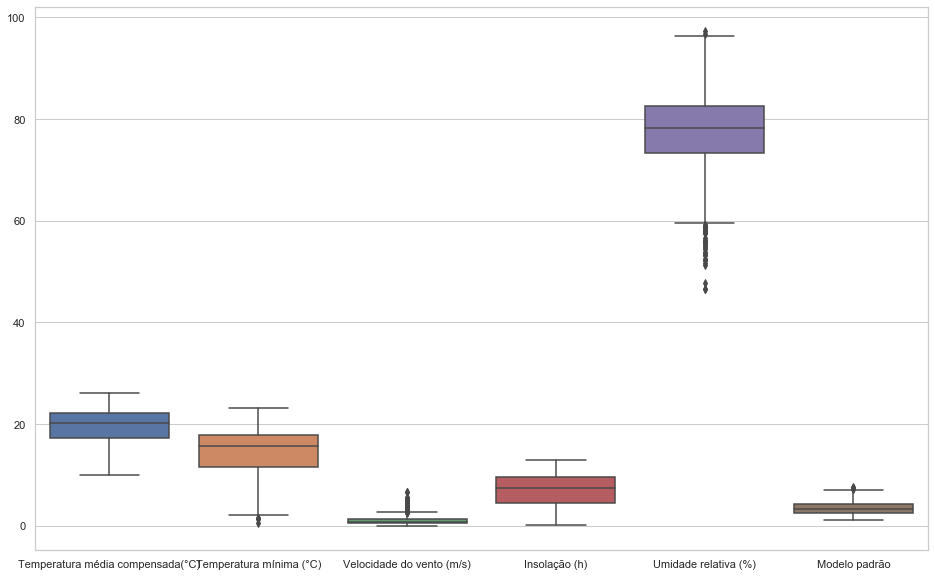

In [112]:
sns.set(style="whitegrid")
plt.figure(figsize=(16,10))
sns.boxplot(data=data.iloc[:,4:])

Nota-se acima que em algumas variáveis há probabilidade de outliers. Nesta análise consideraremos que os valores abaixo do quartil 25% e acima do 75% representam outliers. Como os dados foram coletados via sensores, assumiremos prováveis falhas ou ruídos de medição.

In [113]:
describe_data = data.describe()
describe_data

,ano,dia,mês,Temperatura máxima (°C),Temperatura média compensada(°C),Temperatura mínima (°C),Velocidade do vento (m/s),Insolação (h),Umidade relativa (%),Modelo padrão
count,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000
mean,2004.295864,15.807872,6.474983,26.913676,19.643402,14.651768,1.042522,6.855637,77.428286,3.426701
std,9.477624,8.636185,3.342012,3.164092,3.035628,4.139052,0.888390,3.341670,7.241709,1.199115
min,1980.000000,1.000000,1.000000,15.400000,9.980000,0.500000,0.030000,0.100000,46.500000,1.150000
25%,2000.000000,8.000000,4.000000,24.800000,17.240000,11.600000,0.500000,4.400000,73.250000,2.450000
50%,2006.000000,16.000000,7.000000,27.200000,20.200000,15.600000,0.700000,7.500000,78.250000,3.250000
75%,2011.000000,23.000000,9.000000,29.200000,22.140000,17.900000,1.370000,9.500000,82.500000,4.310000
max,2018.000000,31.000000,12.000000,37.600000,26.200000,23.200000,6.670000,12.900000,97.250000,7.700000


In [114]:
data.columns

Index(['ano', 'dia', 'mês', 'Temperatura máxima (°C)',
       'Temperatura média compensada(°C)', 'Temperatura mínima (°C)',
       'Velocidade do vento (m/s)', 'Insolação (h)', 'Umidade relativa (%)',
       'Modelo padrão'],
      dtype='object')

Abaixo foi criado o detector de outliers considerando a premissa descrita anteriormente e a eliminação dos mesmos.

In [115]:
# Função que detecta como outliers valores acima do quartil de 75% e abaixo de 25%.
def outlier_detector(Q1, Q3):
    
    IQR = Q3-Q1
    out_up = Q3 + 1.5*IQR
    out_down = Q1 - 1.5*IQR    
    return out_up, out_down

#Eliminando os outliers e acrescentando valores nulos nos mesmos a serem tratados posteriormente.
for i in range (3, 10):
    out_up, out_down = outlier_detector(describe_data[data.columns[i]]['25%'], describe_data[data.columns[i]]['75%'])
    data[data.columns[i]].loc[(data[data.columns[i]] > out_up) | (data[data.columns[i]] < out_down)] = np.nan


/Users/gibramoliveira/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Verificando a quantidade de outliers que foram eliminados. Estarão em amarelo no gráfico abaixo.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 10 columns):
ano                                 2998 non-null int64
dia                                 2998 non-null int64
mês                                 2998 non-null int64
Temperatura máxima (°C)             2979 non-null float64
Temperatura média compensada(°C)    2998 non-null float64
Temperatura mínima (°C)             2994 non-null float64
Velocidade do vento (m/s)           2835 non-null float64
Insolação (h)                       2998 non-null float64
Umidade relativa (%)                2947 non-null float64
Modelo padrão                       2993 non-null float64
dtypes: float64(7), int64(3)
memory usage: 234.3 KB


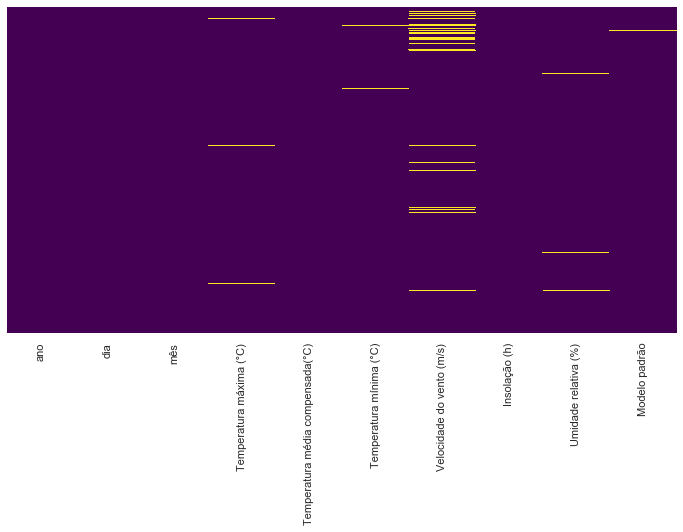

In [116]:
data.info()
plt.figure(figsize=(12,6))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Notam-se acima as variáveis que continham outliers e os mesmos foram eliminados (valores nulos foram colocados no lugar): temperatura máxima, temperatura mínima, velocidade do vento, umidade relativa e modelo padrão.

Preenchimento dos valores excluídos dos outliers pelos valores imediatamente anteriores. Levei em consideração a dinâmica do processo. O fato de serem valores temporalmente correlacionados pressupõe que se substituírmos com os valores imediatamente anteriores teremos poucos problemas.

Outra alternativa seria uma filtragem dos dados. Um filtro passa-baixa poderia contribuir para reduzir a intensidade dos outliers.

In [117]:
data = data.fillna(method='ffill')

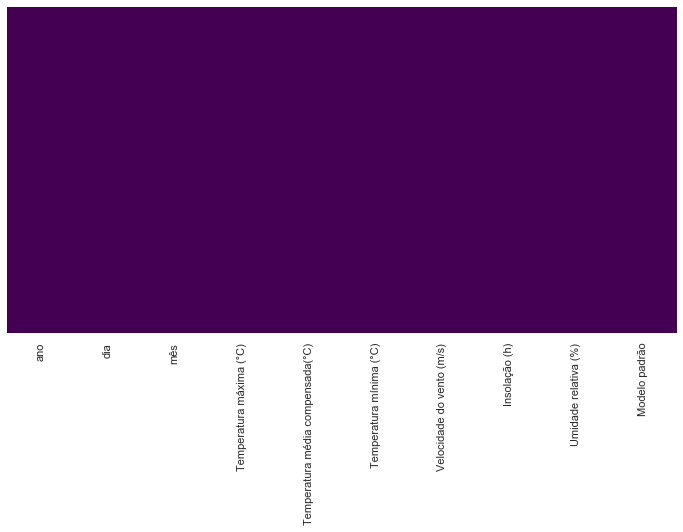

In [118]:
plt.figure(figsize=(12,6))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

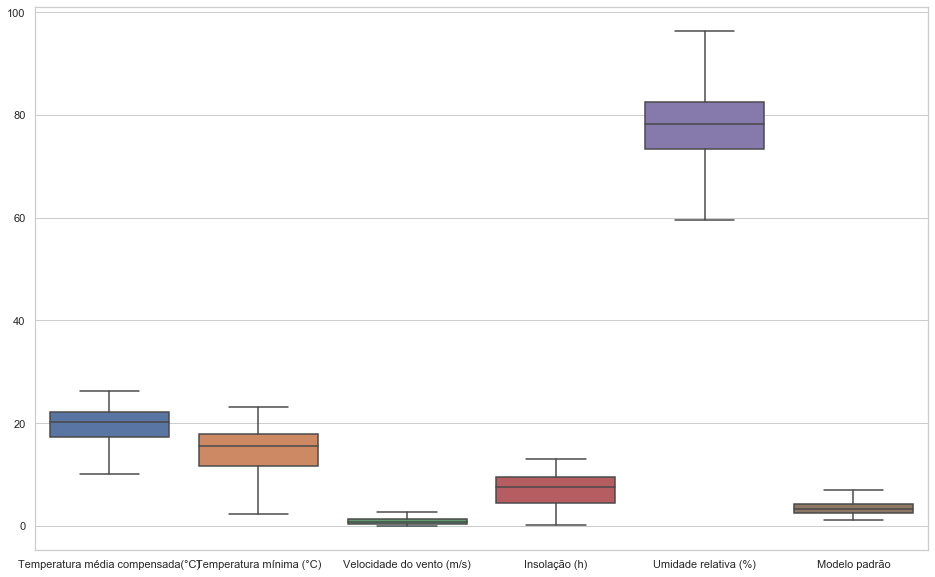

In [119]:
sns.set(style="whitegrid")
plt.figure(figsize=(16,10))
sns.boxplot(data=data.iloc[:,4:])

Nota-se acima que os prováveis outliers foram tratados.

### Algumas análises

#### Verificando o comportamento do clima ao longo do ano

Serão criadas colunas para representaçõa de alguns valores temporais que serão utilizados mais a frente.

In [120]:
from datetime import datetime

In [121]:
data.head()

,ano,dia,mês,Temperatura máxima (°C),Temperatura média compensada(°C),Temperatura mínima (°C),Velocidade do vento (m/s),Insolação (h),Umidade relativa (%),Modelo padrão
0,1980,19,2,25.7,20.26,16.4,2.07,5.3,87.25,3.59
1,1980,21,2,26.6,21.34,15.3,2.10,6.3,84.25,3.78
2,1980,22,2,28.4,20.52,15.8,0.87,7.6,79.75,4.21
3,1980,23,2,30.7,21.94,12.8,1.57,9.5,70.75,5.06
4,1980,29,2,28.8,20.52,15.4,0.70,6.7,79.50,3.88


In [122]:
# Criando a coluna de Timestamp para facilitar o trabalho com datas

Date_Time = data['dia'].astype(str) + '/' + data['mês'].astype(str) + '/' + data['ano'].astype(str)

data['Timestamp'] = 0
for i in range(0, len(Date_Time)):
    data['Timestamp'][i] = datetime.timestamp(datetime.strptime(Date_Time[i], "%d/%m/%Y"))
    
data['Date_Time'] = Date_Time

/Users/gibramoliveira/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [123]:
data.head(5)

,ano,dia,mês,Temperatura máxima (°C),Temperatura média compensada(°C),Temperatura mínima (°C),Velocidade do vento (m/s),Insolação (h),Umidade relativa (%),Modelo padrão,Timestamp,Date_Time
0,1980,19,2,25.7,20.26,16.4,2.07,5.3,87.25,3.59,319777200,19/2/1980
1,1980,21,2,26.6,21.34,15.3,2.10,6.3,84.25,3.78,319950000,21/2/1980
2,1980,22,2,28.4,20.52,15.8,0.87,7.6,79.75,4.21,320036400,22/2/1980
3,1980,23,2,30.7,21.94,12.8,1.57,9.5,70.75,5.06,320122800,23/2/1980
4,1980,29,2,28.8,20.52,15.4,0.70,6.7,79.50,3.88,320641200,29/2/1980


In [124]:
def timestamp_to_datetime(timestamp):
    obj_data = datetime.fromtimestamp(timestamp)    
    return obj_data

def datetime_to_weekday(timestamp):
    datetime = timestamp_to_datetime(timestamp)
    weekday = pd.to_datetime(datetime).strftime('%A')
    return weekday

weekday = datetime_to_weekday(319777200)
print('Dia da semana: ', weekday)

def datetime_to_month(timestamp):
    datetime = timestamp_to_datetime(timestamp)
    month = pd.to_datetime(datetime).month
    return month

month = datetime_to_month(319777200)
print('Mês: ', month)

def datetime_to_year(timestamp):
    datetime = timestamp_to_datetime(timestamp)
    year = pd.to_datetime(datetime).year
    return year

year = datetime_to_year(319777200)
print('Ano: ', year)

Dia da semana:  Tuesday
Mês:  2
Ano:  1980


Criando a coluna de semana

In [125]:
data['Week'] = 0
for i in range(0, len(Date_Time)):
    data['Week'][i] = datetime_to_weekday(data['Timestamp'][i])

/Users/gibramoliveira/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/gibramoliveira/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [126]:
data.head(15)

,ano,dia,mês,Temperatura máxima (°C),Temperatura média compensada(°C),Temperatura mínima (°C),Velocidade do vento (m/s),Insolação (h),Umidade relativa (%),Modelo padrão,Timestamp,Date_Time,Week
0,1980,19,2,25.7,20.26,16.4,2.07,5.3,87.25,3.59,319777200,19/2/1980,Tuesday
1,1980,21,2,26.6,21.34,15.3,2.10,6.3,84.25,3.78,319950000,21/2/1980,Thursday
2,1980,22,2,28.4,20.52,15.8,0.87,7.6,79.75,4.21,320036400,22/2/1980,Friday
3,1980,23,2,30.7,21.94,12.8,1.57,9.5,70.75,5.06,320122800,23/2/1980,Saturday
4,1980,29,2,28.8,20.52,15.4,0.70,6.7,79.50,3.88,320641200,29/2/1980,Friday
5,1980,8,3,28.6,22.26,15.7,0.50,8.2,72.75,4.10,321332400,8/3/1980,Saturday
6,1980,9,3,29.3,20.64,14.1,2.23,9.9,75.50,5.03,321418800,9/3/1980,Sunday
7,1980,11,3,28.9,21.12,15.3,0.50,9.1,71.50,4.20,321591600,11/3/1980,Tuesday
8,1980,17,3,27.1,20.48,14.1,2.40,10.4,78.25,4.58,322110000,17/3/1980,Monday
9,1980,23,3,30.2,20.42,12.9,1.53,9.5,77.75,4.51,322628400,23/3/1980,Sunday


#### Correlação entre as variáveis:

In [127]:
tabela_correlacao = data.corr()

In [128]:
tabela_correlacao

,ano,dia,mês,Temperatura máxima (°C),Temperatura média compensada(°C),Temperatura mínima (°C),Velocidade do vento (m/s),Insolação (h),Umidade relativa (%),Modelo padrão,Timestamp
ano,1.000000,-0.009859,-0.043499,0.072442,0.102143,0.147807,-0.349427,0.051410,-0.041308,-0.004493,0.999566
dia,-0.009859,1.000000,-0.014444,0.001493,-0.001040,-0.000839,0.038787,-0.004954,0.000658,0.000321,-0.007801
mês,-0.043499,-0.014444,1.000000,-0.135054,-0.154269,-0.126221,0.077548,-0.051931,-0.171203,-0.000773,-0.014163
Temperatura máxima (°C),0.072442,0.001493,-0.135054,1.000000,0.759541,0.474272,-0.063048,0.443659,-0.373678,0.715312,0.068586
Temperatura média compensada(°C),0.102143,-0.001040,-0.154269,0.759541,1.000000,0.869931,0.058852,0.086385,-0.185374,0.687925,0.097759
Temperatura mínima (°C),0.147807,-0.000839,-0.126221,0.474272,0.869931,1.000000,0.043452,-0.186974,0.074928,0.467560,0.144279
Velocidade do vento (m/s),-0.349427,0.038787,0.077548,-0.063048,0.058852,0.043452,1.000000,0.039729,-0.199916,0.287070,-0.347333
Insolação (h),0.051410,-0.004954,-0.051931,0.443659,0.086385,-0.186974,0.039729,1.000000,-0.602659,0.609579,0.049917
Umidade relativa (%),-0.041308,0.000658,-0.171203,-0.373678,-0.185374,0.074928,-0.199916,-0.602659,1.000000,-0.580501,-0.046413
Modelo padrão,-0.004493,0.000321,-0.000773,0.715312,0.687925,0.467560,0.287070,0.609579,-0.580501,1.000000,-0.004440


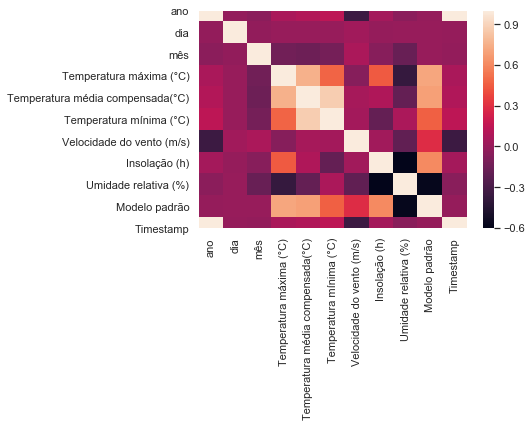

In [129]:
sns.heatmap(data.corr())

In [130]:
data.columns

Index(['ano', 'dia', 'mês', 'Temperatura máxima (°C)',
       'Temperatura média compensada(°C)', 'Temperatura mínima (°C)',
       'Velocidade do vento (m/s)', 'Insolação (h)', 'Umidade relativa (%)',
       'Modelo padrão', 'Timestamp', 'Date_Time', 'Week'],
      dtype='object')

In [148]:
tabela_correlacao['Modelo padrão'].sort_values(ascending=False)

Modelo padrão                       1.000000
Temperatura máxima (°C)             0.715312
Temperatura média compensada(°C)    0.687925
Insolação (h)                       0.609579
Temperatura mínima (°C)             0.467560
Velocidade do vento (m/s)           0.287070
dia                                 0.000321
mês                                -0.000773
Timestamp                          -0.004440
ano                                -0.004493
Umidade relativa (%)               -0.580501
Name: Modelo padrão, dtype: float64

Nota-se acima que as variáveis mais correlacionadas com a variável preditiva são, na seguinte ordem:

- Temperatura máxima (°C)             
- Temperatura média compensada(°C)    
- Insolação (h)
- Umidade relativa (%)
- Temperatura mínima (°C)
- Velocidade do vento (m/s)

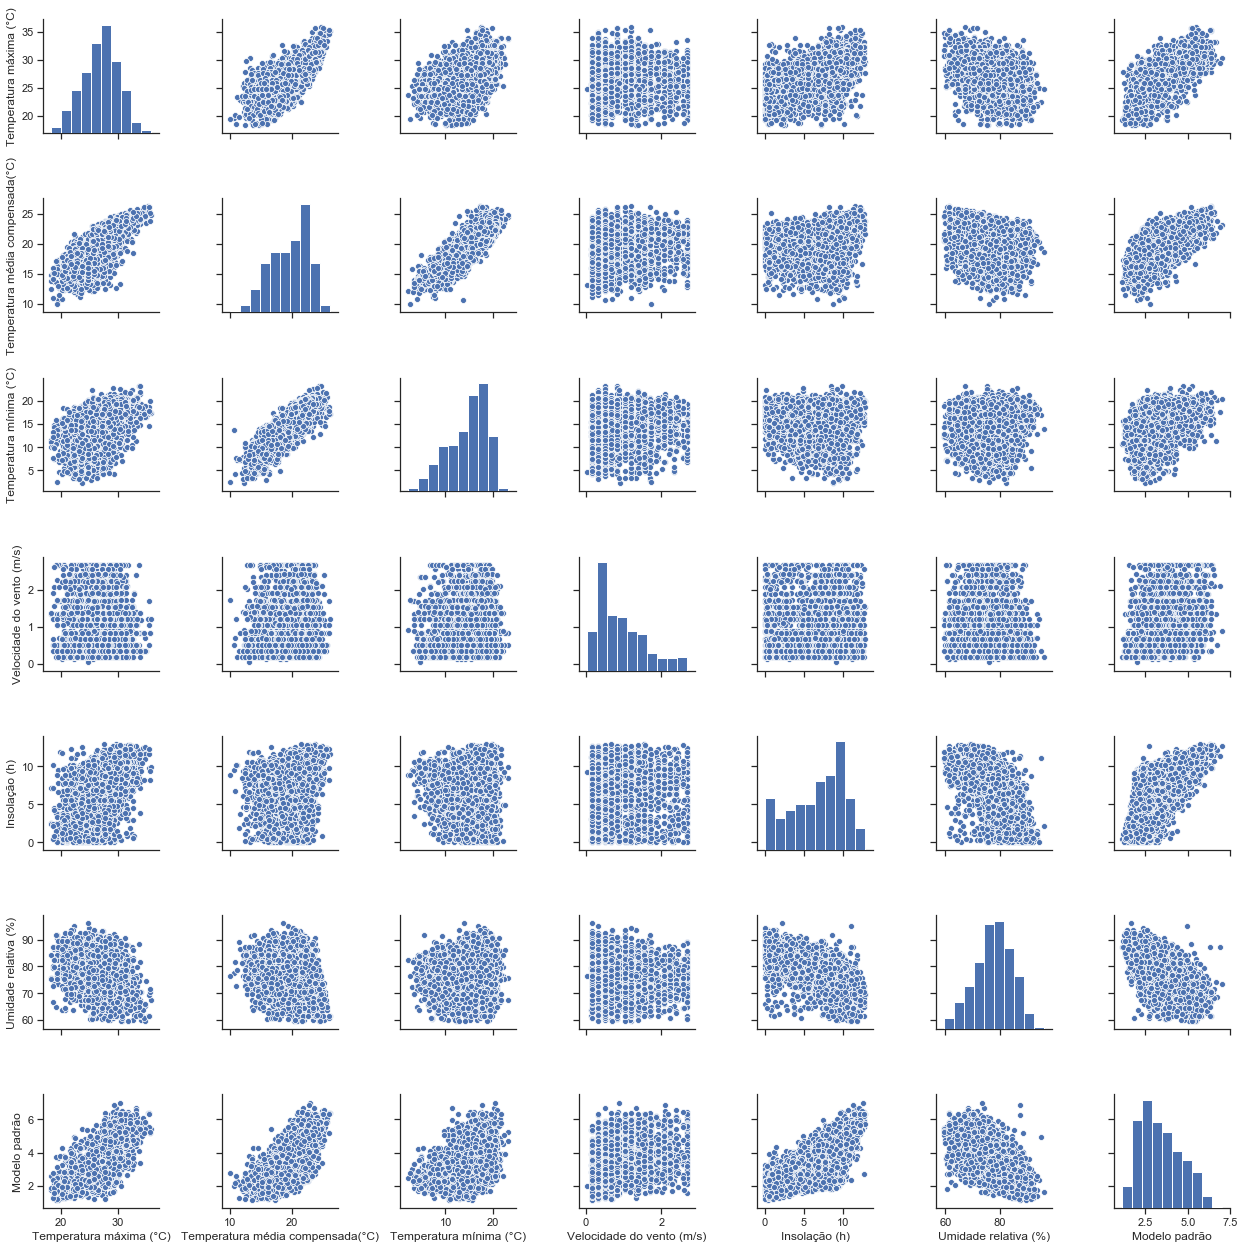

In [151]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data.iloc[:,3:-3])

### Criando um modelo de predição

Para a predição da variável Modelo Padrão será utilizado um modelo de regressão bastante robusto e utilizado em aplicações industriais: o XGBoost (https://arxiv.org/pdf/1603.02754.pdf)

In [160]:
#!pip install xgboost
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [152]:
data.head(5)

,ano,dia,mês,Temperatura máxima (°C),Temperatura média compensada(°C),Temperatura mínima (°C),Velocidade do vento (m/s),Insolação (h),Umidade relativa (%),Modelo padrão,Timestamp,Date_Time,Week
0,1980,19,2,25.7,20.26,16.4,2.07,5.3,87.25,3.59,319777200,19/2/1980,Tuesday
1,1980,21,2,26.6,21.34,15.3,2.10,6.3,84.25,3.78,319950000,21/2/1980,Thursday
2,1980,22,2,28.4,20.52,15.8,0.87,7.6,79.75,4.21,320036400,22/2/1980,Friday
3,1980,23,2,30.7,21.94,12.8,1.57,9.5,70.75,5.06,320122800,23/2/1980,Saturday
4,1980,29,2,28.8,20.52,15.4,0.70,6.7,79.50,3.88,320641200,29/2/1980,Friday


In [154]:
data.iloc[:,-4]

0       3.59
1       3.78
2       4.21
3       5.06
4       3.88
        ... 
2993    1.94
2994    4.01
2995    3.48
2996    4.26
2997    3.27
Name: Modelo padrão, Length: 2998, dtype: float64

In [157]:
X, y = data.iloc[:,3:-4], data.iloc[:,-4]

In [158]:
X.columns

Index(['Temperatura máxima (°C)', 'Temperatura média compensada(°C)',
       'Temperatura mínima (°C)', 'Velocidade do vento (m/s)', 'Insolação (h)',
       'Umidade relativa (%)'],
      dtype='object')

In [161]:
#Convertendo o dataset para uma estrutura matricial otimizada Dmatrix
#suportada pelo xgboost e que aumenta a performance e ganho de eficiência.
data_dmatrix = xgb.DMatrix(data=X,label=y)

Definindo o conjunto treino-teste para a validação cruzada:

In [162]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
# random_state foi definido para se manter a reprodutibilidade dos resultados

Chamando o regressor:

In [163]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.16, max_depth = 4, alpha = 10, n_estimators = 200)
#Utilizei regularização L1 no parâmetro alpha (quanto maior, mais regularização)

Realizando o treino e a predição:

In [164]:
xg_reg.fit(X_train,y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bytree=0.3, gamma=0, learning_rate=0.16,
             max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
             n_estimators=200, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=True, subsample=1)

In [177]:
preds = xg_reg.predict(X_test)

In [178]:
from sklearn.metrics import r2_score

r2_score(y_test, preds)

0.86902053416761

In [206]:
print("Tabela com alguns resultados encontrados pelo modelo:")
pd.DataFrame({'modelo padrão':  y_test,'resultado calculado':  np.round(preds,2), 'acurácia':  np.round(preds/y_test,2)}).head(30)

Tabela com alguns resultados encontrados pelo modelo:


,modelo padrão,resultado calculado,acurácia
134,2.67,2.48,0.93
1203,5.92,5.89,0.99
975,4.27,4.14,0.97
80,4.72,4.94,1.05
803,5.17,4.55,0.88
2590,3.37,3.61,1.07
1370,4.03,4.64,1.15
242,3.59,2.73,0.76
1215,2.85,2.66,0.93
841,4.29,4.48,1.04


Verificando a métrica do erro quadrático médio:

In [180]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.444424


#### Verificando as variáveis mais importantes:

In [181]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[23:48:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[23:48:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[23:48:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:48:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:48:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[23:48:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[23:48:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[23:48:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[23:48:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4


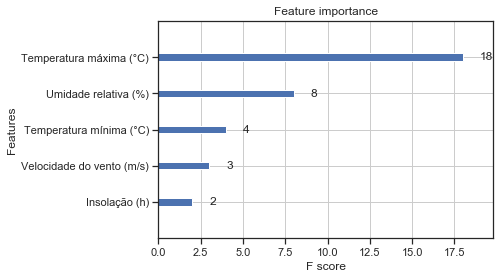

In [182]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

Nota-se acima que a variável *Temperatura máxima* possui maior score de importância para a predição do nível de evaporação (tendo como referência o modelo padrão).

Para se ter uma visão do nível de influência das demais variáveis sobre o nível de evaporação utilizarei uma técnica de explicabilidade baseada na teoria dos jogos: SHAP

### SHAP - SHapley Additive exPlanations

A técnica SHAP, baseada na teoria dos jogos, rendeu ao seu criador o NOBEL de economia. 

(http://papers.nips.cc/paper/7062-a-unified-approach-to-interpreting-model-predictions)

É uma técnica excelente para as tentativas iniciais de explicabilidade de modelos.

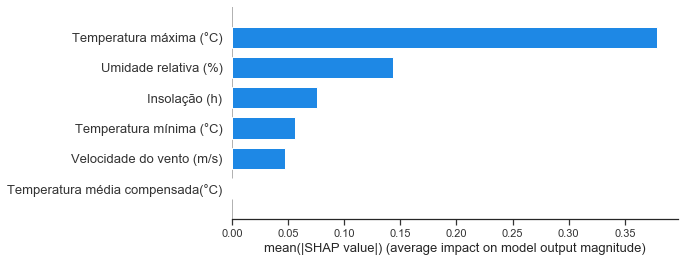

In [183]:
#!pip install shap
import shap
shap_values = shap.TreeExplainer(xg_reg).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

Acima as variáveis de maior impacto médio na saída do modelo.

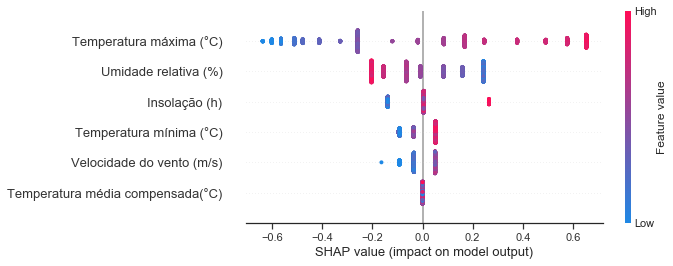

In [184]:
shap.summary_plot(shap_values, X_train)

A interpretação do gráfico acima é interessante. Vou usar como exemplo a variável 'Temperatura máxima'.

Nota-se um braço azul mais longo dela para a esquerda. Azul significa que sua redução contribui para redução do valor do nível de evaporação.

Para a variável 'Umidade relativa', um aumento desta variável (lado esquerdo do eixo vertical-0, cor vermelha) significa impacto negativo na saída do modelo, contribuindo para uma redução da evaporação. Uma redução em seu valor (lado direito do eixo vertical-0) significa impacto positivo na saída do modelo, contribuindo para um aumento da evaporação.

Nota-se algo interessante que os dados dizem mas que precisaria da ajuda do especialista para entender:

1) Em alguns casos particulares, um aumento da temperatura máxima pode contribuir também para a redução da evaporação. O mesmo ocorre com a temperatura mínima.
2) Em alguns casos particulares, um aumento da umidade relativa pode contribuir também para um aumento da evaporação.

Minha hipótese é que estas exceções ocorrem para casos específicos de combinações de comportamentos de outras variáveis.

3) Uma diminuição da velocidade do vento influencia na redução da evaporação. Porém em alguns casos notou-se que uma redução da velocidade do vento também contribuiu para um aumento da evaporação.

Será que alterações na direção do vento contribuem para este efeito?


In [196]:
# Para utilizar no jupyter notebook, é necessário  initjs(), otherwise you will get an error message.
shap.initjs()


In [197]:
explainer = shap.TreeExplainer(xg_reg)
shap_values = explainer.shap_values(X_train)

In [198]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

Note a figura acima. Trata-se de apenas uma amostra de predição. 

É intepretado da seguinte forma:

Para um evento ocorrido no qual a evaporação atingiu o valor diário de 3.32, a insolação e a umidade relativa neste dia foram as que mais contribuiram para que a evaporação atingisse este valor. As temperatura mínima e velocidade do vento influenciaram para que a evaporação não aumentasse mais ainda. Porém notam-se que tiveram menor influência para segurar o aumento da evaporação. Deve ter sido um dia quente.

Provavelmente foi um dia ensolarado.

Estranho é nese caso o aumento da umidade contribuir para a evaporação. 

Minha hipótese é um efeito contrário: o dia estava muito ensolarado, e o excesso de evaporação é que pode ter contribuido para um aumento da umidade. Deveria estar próximo a saturação e em horário próximo ao pico de insolação durante esta medição.


### Construindo inovação

Imaginemos o cenário no qual os dados para serem coletados em campo necessitam de equipamentos caros ou difíceis de instalar.

Sabemos também que, normalmente, os kits de sensores ficam mais caros a medida que maior variedade de informações são coletadas. 

Para atingir um resultado próximo ao modelo padrão, as seguintes variáveis foram medidas:

- Temperatura
- Velocidade do vento
- Insolação
- Umidade

Cada variável necessita de um sensor distinto e a dificuldade de instalação dos mesmos  e custos aumentam a medida que novos sensores vão sendo acrescentados.

Observando novamente abaixo o gráfico de variáveis mais influentes e sabendo que a temperatura possui maior associação com a evaporação. Além disso tempos 3 temperaturas diferentes e que todas as 3 podem ser medidas e/ou calculadas por apenas 1 sensor, iremos validar a seguinte hipótese:

*Será que se utilizarmos apenas 1 termômetro conseguiríamos calcular a evaporação encontrando um valor aceitável?*

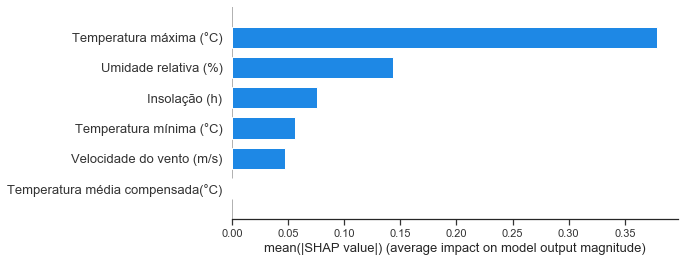

In [201]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

Esta hipótese possui duas partes:

    1) Definirmos o que significa *valor aceitável*
    2) Descobrirmos o que conseguimos fazer apenas com as variáveis temperatura
    
Para o item 1, ficará a cargo do especialista nos indicar o que seria um valor (ou acurácia) aceitável para as aplicações práticas com o resultado encontrado da evaporação.

Da parte do cientista de dados, iremos calcular a evaporação com dados apenas do termômetro

#### Modelagem da evaporação apenas com dados de temperatura

In [205]:
data.head()

,ano,dia,mês,Temperatura máxima (°C),Temperatura média compensada(°C),Temperatura mínima (°C),Velocidade do vento (m/s),Insolação (h),Umidade relativa (%),Modelo padrão,Timestamp,Date_Time,Week
0,1980,19,2,25.7,20.26,16.4,2.07,5.3,87.25,3.59,319777200,19/2/1980,Tuesday
1,1980,21,2,26.6,21.34,15.3,2.10,6.3,84.25,3.78,319950000,21/2/1980,Thursday
2,1980,22,2,28.4,20.52,15.8,0.87,7.6,79.75,4.21,320036400,22/2/1980,Friday
3,1980,23,2,30.7,21.94,12.8,1.57,9.5,70.75,5.06,320122800,23/2/1980,Saturday
4,1980,29,2,28.8,20.52,15.4,0.70,6.7,79.50,3.88,320641200,29/2/1980,Friday


In [207]:
X, y = data.iloc[:,3:-7], data.iloc[:,-4]

In [208]:
X.columns

Index(['Temperatura máxima (°C)', 'Temperatura média compensada(°C)',
       'Temperatura mínima (°C)'],
      dtype='object')

Nota-se acima que apenas as 3 informações de temperatura serão utilizadas para treinar o modelo.

In [212]:
#Convertendo o dataset para uma estrutura matricial otimizada Dmatrix
#suportada pelo xgboost e que aumenta a performance e ganho de eficiência.
data_dmatrix = xgb.DMatrix(data=X,label=y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
# random_state foi definido para se manter a reprodutibilidade dos resultados

Chamando o regressor:

In [287]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.3, max_depth = 2, alpha = 10, n_estimators = 200)
#Utilizei regularização L1 no parâmetro alpha (quanto maior, mais regularização)

Realizando a predição:

In [288]:
xg_reg.fit(X_train,y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bytree=0.3, gamma=0, learning_rate=0.3, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1)

In [289]:
preds_soft = xg_reg.predict(X_test)

In [290]:
r2_score(y_test, preds_soft)

0.610893061065685

Verificando a métrica do erro quadrático médio:

In [291]:
rmse = np.sqrt(mean_squared_error(y_test, preds_soft))
print("RMSE: %f" % (rmse))

RMSE: 0.766003


In [325]:
print("Tabela com alguns resultados encontrados pelo modelo:")
resultados = pd.DataFrame({'modelo padrão':  y_test,
              'resultado calculado':  np.round(preds,2), 'acurácia modelo completo':  np.round(preds/y_test,2),
              'modelo simplificado apenas temperatura':  np.round(preds_soft,2), 'acurácia modelo simplificado':  np.round(preds_soft/y_test,2)})

resultados.head(10)

Tabela com alguns resultados encontrados pelo modelo:


,modelo padrão,resultado calculado,acurácia modelo completo,modelo simplificado apenas temperatura,acurácia modelo simplificado
134,2.67,2.48,0.93,2.58,0.96
1203,5.92,5.89,0.99,4.03,0.68
975,4.27,4.14,0.97,4.58,1.07
80,4.72,4.94,1.05,5.04,1.07
803,5.17,4.55,0.88,4.42,0.86
2590,3.37,3.61,1.07,3.06,0.91
1370,4.03,4.64,1.15,3.91,0.97
242,3.59,2.73,0.76,3.03,0.84
1215,2.85,2.66,0.93,2.92,1.02
841,4.29,4.48,1.04,4.41,1.03


Verificando a variabilidade da acurácia de ambos os modelos:

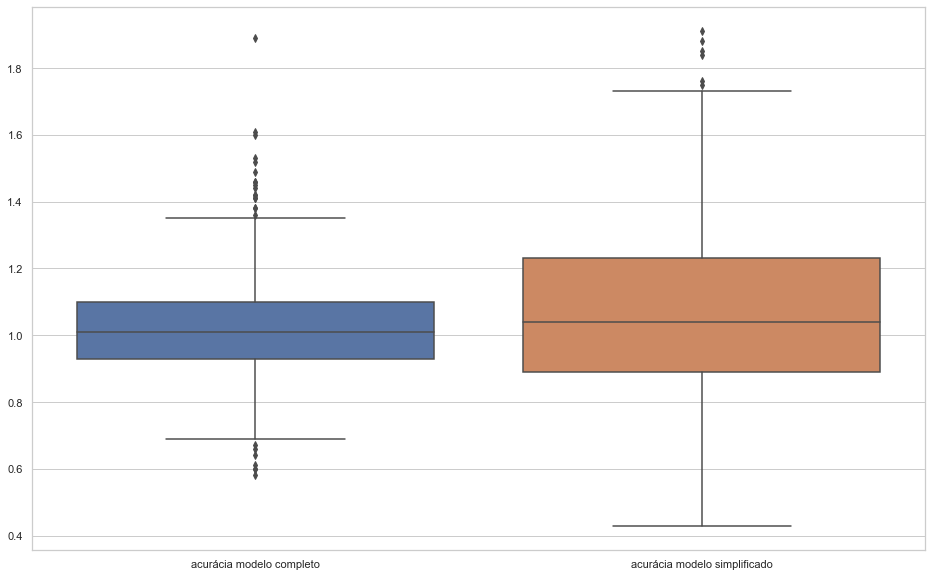

In [326]:
sns.set(style="whitegrid")
plt.figure(figsize=(16,10))
sns.boxplot(data=resultados[['acurácia modelo completo', 'acurácia modelo simplificado']])

In [330]:
resultados.describe()

,modelo padrão,resultado calculado,acurácia modelo completo,modelo simplificado apenas temperatura,acurácia modelo simplificado
count,600.000000,600.000000,600.000000,600.000000,600.000000
mean,3.379133,3.415302,1.023700,3.438600,1.070817
std,1.229017,1.197982,0.155708,0.986211,0.245178
min,1.280000,1.030000,0.580000,1.720000,0.430000
25%,2.340000,2.517500,0.930000,2.580000,0.890000
50%,3.125000,3.270000,1.010000,3.330000,1.040000
75%,4.262500,4.250000,1.100000,4.270000,1.230000
max,6.560000,6.740000,1.890000,6.340000,1.910000


Alguns pontos interessantes que podemos verificar no boxplot e tabela acima nos quais comparamos os dois modelos:

    1) modelo completo, ou seja, utilizando todas as variáveis da base
    2) modelo simplificado, ou seja, utilizando apenas informação de temperatura, economizando e simplificando a coleta de dados
    
    
    
- Há uma maior variabilidade (era de se esperar) nos resultados para o modelo simplificado.
- Na média, o modelo simplificado erra para valores maiores que o modelo padrão. O mesmo acontece para o modelo completo. Ou seja, em média, ambos identificam maior evaporação do que realmente ocorreu.
- 50% das ocorrências para o modelo simplificado erram de 89% a 123% do modelo padrão. Já o modelo completo erra de 93% a 110%

Alguas hipóteses para melhoria do modelo apenas com termômetros:

    0) Validar o quanto se pode ganhar com este resultado encontrado.
    1) Melhoria na sintonia do modelo e utilização de outras técnicas de machine learning.
    2) Incluir análise temporal
    3) Acrescentar a variável insolação através de site de previsão do tempo (climatempo, por exemplo), sem coletar via sensoriameento próprio em campo. Incluir outras variáveis através do mesmo procedimento.
    4) Realizar uma medição distribuída de temperatura. Com o termômetro é bem barato, pode-se inclui-lo em todas as áreas de plantio, favorecendo a medição com maior glanularidade.
    5) Criar novas variáveis (engenharia de features) com as informações de data e hora.

_________________________________________________________________________________________________________________

### Conclusões sobre a primeira iteração:

Este é o fim da primeira iteração. O objetivo dela foi:

1) realizar um entendimento inicial dos dados e possibilitar algumas análises iniciais e algumas hipóteses.

2) criar o primeiro modelo sem muita preocupação em performance mas apenas para ser possível validar e atingir um nível de acurácia aceitável.

3) não foi utilizada nenhuma análise criteriosa das métricas do modelo.

4) para isso utilizou-se ao acaso apenas 1 cidade para o estudo. Nas próximas iterações as demais cidades serão incluídas no estudo.

5) análise temporal foi desconsiderada. Será considerada nas próximas iterações.

6) cada apresentação dos resultados para o especialista significará uma iteração. E o feedback do mesmo com novos conhecimentos a serem acrescentados auxiliarão na construção de um modelo com performance otimizada.